#preprocessing


In [1]:
import pandas as pd

df_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df_business = df_business[df_business.city == 'Philadelphia']

df_business.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_business.to_csv('business_preprocessed.csv')


chunks = pd.read_json('yelp_academic_dataset_review.json', lines=True,chunksize=100000)

df_reviews = pd.DataFrame()


dataProcessed = 0
for chunk in chunks:
    dataProcessed+=1
    temp = pd.merge(left=df_business, right=chunk, on='business_id')
    print(f'data processed = {dataProcessed*100000}')
    df_reviews = pd.concat([df_reviews,temp])

df_reviews.to_csv('reviews_preprocessed.csv')


data processed = 100000
data processed = 200000
data processed = 300000
data processed = 400000
data processed = 500000
data processed = 600000
data processed = 700000
data processed = 800000
data processed = 900000
data processed = 1000000
data processed = 1100000
data processed = 1200000
data processed = 1300000
data processed = 1400000
data processed = 1500000
data processed = 1600000
data processed = 1700000
data processed = 1800000
data processed = 1900000
data processed = 2000000
data processed = 2100000
data processed = 2200000
data processed = 2300000
data processed = 2400000
data processed = 2500000
data processed = 2600000
data processed = 2700000
data processed = 2800000
data processed = 2900000
data processed = 3000000
data processed = 3100000
data processed = 3200000
data processed = 3300000
data processed = 3400000
data processed = 3500000
data processed = 3600000
data processed = 3700000
data processed = 3800000
data processed = 3900000
data processed = 4000000
data proc

In [3]:
df_business.shape

(14569, 14)

In [4]:
df_reviews.shape

(967552, 22)

#Askisi 3A


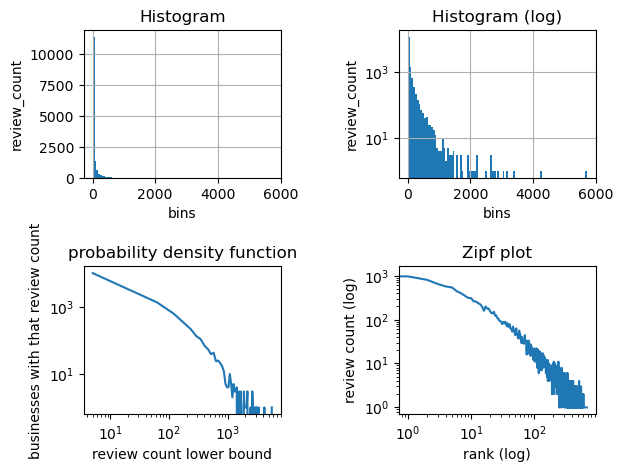

In [5]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
import seaborn

df_business = pd.read_csv('business_preprocessed.csv')

#1
f, axs = plt.subplots(2, 2)
df_business.hist(column= 'review_count',bins=100,label='1',ax=axs[0,0])
plt.subplot(2,2,1)
plt.ylabel('review_count')
plt.title('Histogram')
plt.xlabel('bins')

#2
df_business.hist(column= 'review_count',bins=100,log=True,label='2',ax=axs[0,1])
plt.subplot(2,2,2)
plt.ylabel('review_count')
plt.title('Histogram (log)')
plt.xlabel('bins')

# 3
reviews_count = df_business['review_count']

all_values = []
for i in reviews_count:
    if i not in all_values:
        all_values.append(i)
all_values.sort()

w = (max(all_values) - min(all_values)) / 100

x_axis = [min(all_values) + i * w for i in range(100)] #101 mono gia na kanei tin sigkrisi meta to kanw pop
y_axis = [0 for i in range(100)]

for i in reviews_count:
    for j in range(len(x_axis)):
        if j==99:
            if x_axis[99]<i:
                y_axis[99]+=1
        else:
            if x_axis[j] < i < x_axis[j + 1]:
                y_axis[j] += 1

plt.subplot(2,2,3)
plt.plot(x_axis,y_axis,label='3')
plt.yscale('log')
plt.title('probability density function')
plt.ylabel('businesses with that review count')
plt.xlabel('review count lower bound')
plt.xscale('log')

#4
reviews_count = df_business['review_count']

all_values = []
for i in reviews_count:
    if i not in all_values:
        all_values.append(i)
all_values.sort(reverse=False)

y_axis = [0 for i in range(len(all_values))]
x_axis = [i for i in range(len(all_values))]

for i in reviews_count:
    for j in range(len(all_values)):
        if i==all_values[j]:
            y_axis[j]+=1

plt.subplot(2,2,4)
plt.plot(x_axis,y_axis,label='4')
plt.yscale('log')
plt.title('Zipf plot')
plt.ylabel('review count (log)')
plt.xlabel('rank (log)')
plt.xscale('log')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.6)
plt.show()

In [7]:
df_business.shape

(14569, 15)

Απο τα 2 ιστογραμματα παρατηρουμε οτι οσο αυξανεται ο αξονας χ μειωνεται ραγδαια ο αξονας y που σημαινει οτι λιγες επιχειρησεις εχουν 10000+ reviews ενω οσο μειωνεται το review count τοσο αυξανεται το πληθος των επιχειρησεων που εχουν τοσα reviews.
Το ιδιο παρατηρουμε και απο την συναρτηση πυκνοτητας πιθανοτητας που μας δειχνει οτι οσο αυξανεται το πληθος των review count (εκθετικα γιατι εχουμε λογαριθμικη κλιμακα) μειωνεται εξισσου γρηγορα και ο αριθμος των επιχειρησεων που εχουν τοσα reviews (επισης εκθετικα γιατι και στον αξονα y εχουμε λογαριθμικη κλιμακα). Παλι βλεπουμε οτι για μεγαλο πληθος review_count ( >10^3 ) υπαρχουν λιγες επιχειρησεις ( <10 ) που εχουν τοσα reviews.
Στο Zipf plot παρατηρουμε οτι το πληθος των review count μειωνεται εκθετικα (σε λογαριθμικη κλιμακα οποτε ειναι πολυ γρηγορη μειωση) οσο αυξανεται το rank το οποιο ειναι λογικο αφου το μεγιστο revιew count εχει rank 1 , το 2ο μεγαλυτερο rank 2 κ.ο.κ.. Αυτο μας επιβεβαιωνει τα παραπανω γραφηματα αφου ειναι λογικο τα μεγαλυτερα ranks  (>10^2) να εχουν το μικροτερο πληθος reviews.


#Askisi 3B

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'review_id', 'user_id',
       'stars_y', 'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')


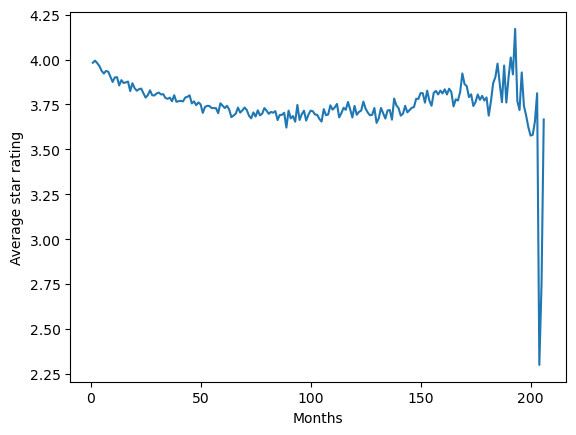

In [8]:
#3B
df_reviews = pd.read_csv('reviews_preprocessed.csv')
print(df_reviews.columns)
df_reviews = df_reviews[['business_id','date','stars_y']].sort_values(by=['business_id','date'])




#df_reviews['DateTime'] = pd.to_datetime(df_reviews['date']).dt.date
df_reviews["date"] = pd.to_datetime(df_reviews["date"], infer_datetime_format=True)
#print(df_reviews)
df_reviews_grouped = df_reviews.groupby("business_id")
reviews = [[] for i in range((math.ceil((df_reviews['date'].max()-df_reviews['date'].min()).total_seconds()/2592000))-1)]
for idx,group in df_reviews_grouped:
    min_date = group['date'].min()
    for index,row in group.iterrows():
        timeDiffHRS = (row['date']-min_date).total_seconds()/3600
        timeDiffDAYS = timeDiffHRS/24
        month = math.floor(timeDiffDAYS/30)
        reviews[month].append(row['stars_y'])
#print(reviews)
reviewsMeans=[]
for i in range(len(reviews)):
    reviewsMeans.append(sum(reviews[i])/len(reviews[i]))
x_axis = [i+1 for i in range(len(reviewsMeans))]
plt.xlabel('Months')
plt.ylabel('Average star rating')
plt.plot(x_axis,reviewsMeans)
#print(reviewsMeans)

plt.show()

In [9]:
df_reviews.shape

(967552, 3)

Απο το γραφημα αυτο παρατηρουμε οτι το average star rating ξεκιναει σχετικα υψηλα σε πολλες επιχειρησεις και οσο περνανε οι μηνες για τις πιο πολλες επιχειρησεις το average αυτο πεφτει με μικρο ρυθμο ομως. Η αυξηση παλι αρχιζει να παρατηρειται στα μαγαζια που υπαρχουν για πολλους μηνες . Τελος η ραγδαια πτωση που παρατηρειται μετα τους 200 μηνες δεν ειναι ιδιαιτερα σημαντικη μιας και δεν υπαρχουν αρκετα μαγαζια που να δεχονται reviews εδω και 200+ μηνες οποτε το average star rating εκει ειναι αρκετα ευμεταβλητο σε καθε καινουριο review και δεν ειναι ενδεικτικο καθε επιχειρησης που θα φτασει στους 200+ μηνες.

#3Β για 5 χρονια


Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'review_id', 'user_id',
       'stars_y', 'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')


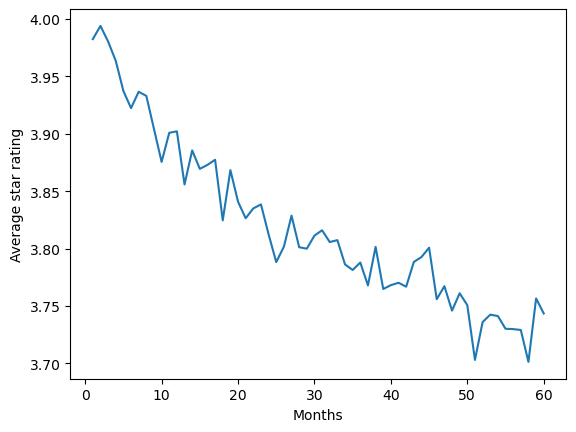

In [10]:
#3B 5YEARS
df_reviews = pd.read_csv('reviews_preprocessed.csv')
print(df_reviews.columns)
df_reviews = df_reviews[['business_id','date','stars_y']].sort_values(by=['business_id','date'])




#df_reviews['DateTime'] = pd.to_datetime(df_reviews['date']).dt.date
df_reviews["date"] = pd.to_datetime(df_reviews["date"], infer_datetime_format=True)
#print(df_reviews)
df_reviews_grouped = df_reviews.groupby("business_id")
reviews = [[] for i in range((math.ceil((df_reviews['date'].max()-df_reviews['date'].min()).total_seconds()/2592000))-1)]
for idx,group in df_reviews_grouped:
    min_date = group['date'].min()
    for index,row in group.iterrows():
        timeDiffHRS = (row['date']-min_date).total_seconds()/3600
        timeDiffDAYS = timeDiffHRS/24
        month = math.floor(timeDiffDAYS/30)
        reviews[month].append(row['stars_y'])
#print(reviews)
reviewsMeans=[]
for i in range(len(reviews)):
    if i<60:
        reviewsMeans.append(sum(reviews[i])/len(reviews[i]))
x_axis = [i+1 for i in range(len(reviewsMeans))]
plt.xlabel('Months')
plt.ylabel('Average star rating')
plt.plot(x_axis,reviewsMeans)
#print(reviewsMeans)

plt.show()

In [11]:
df_reviews.shape

(967552, 3)

Οπως αναφεραμε και πιο πανω μια επιχειρηση εχει σχετικα υψηλο average star rating τους πρωτους μηνες το οποιο μειωνεται γραμμικα και με σχετικα μικρη κλιση μεσα στα πρωτα 5 χρονια.

#Askisi 3C

C:\Users\Mainframe\AppData\Local\Temp\ipykernel_21264\1789816757.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  corr_graph.set_xticklabels(['']+names)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_21264\1789816757.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  corr_graph.set_yticklabels(['']+names)


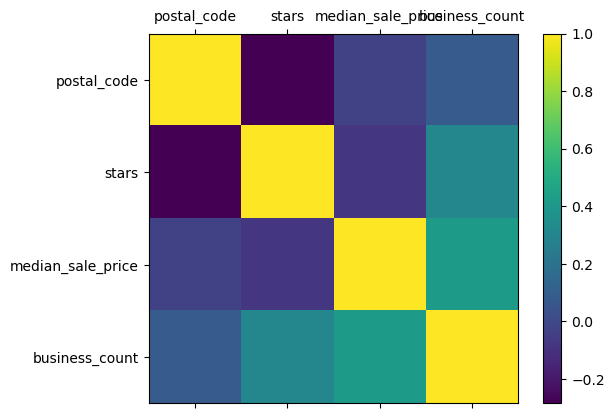

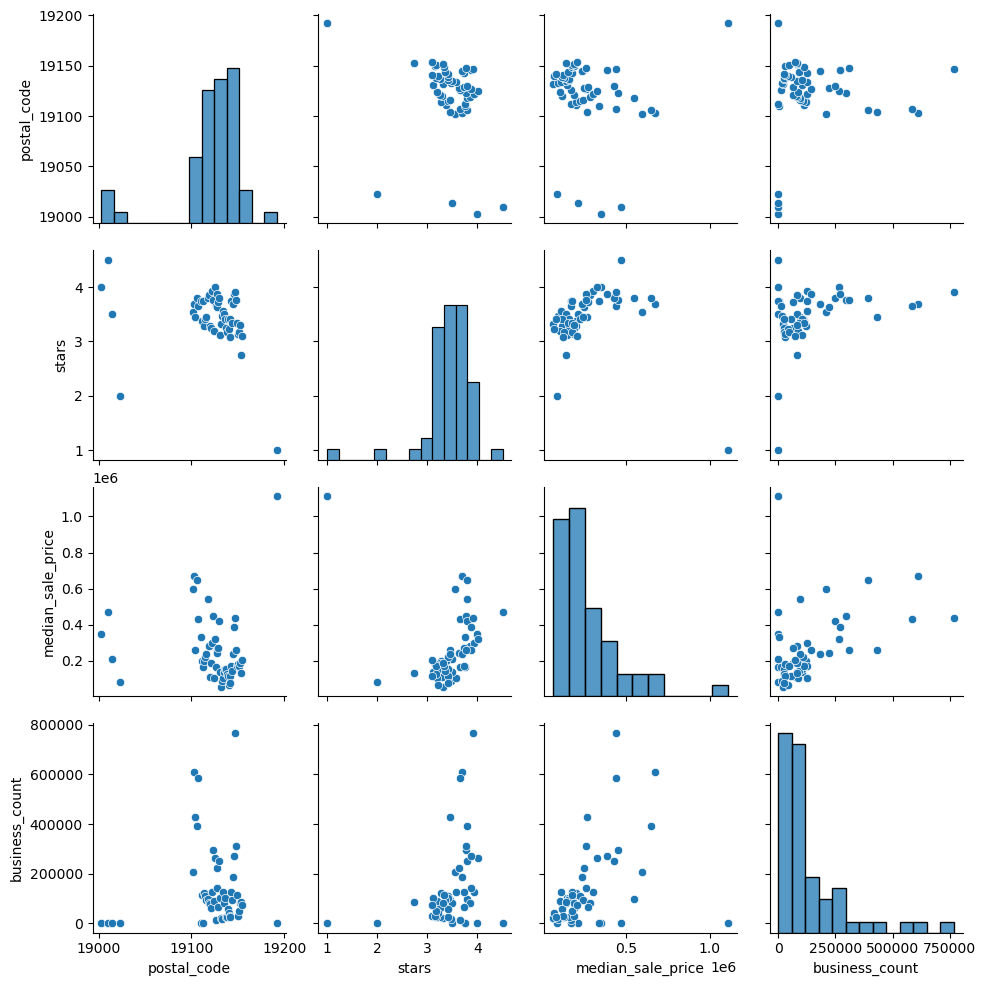

postal_code - stars 
 PearsonRResult(statistic=-0.2842829189861529, pvalue=0.03910893219966151)
postal_code - median_sale_price 
 PearsonRResult(statistic=-0.03058901345022136, pvalue=0.8278716414277779)
postal_code - business_count 
 PearsonRResult(statistic=0.08362217334470787, pvalue=0.5516387458870379)
stars - median_sale_price 
 PearsonRResult(statistic=-0.0813599193166252, pvalue=0.562490075358319)
stars - business_count 
 PearsonRResult(statistic=0.31200848411762877, pvalue=0.022942137656827524)
median_sale_price - business_count 
 PearsonRResult(statistic=0.4138703920495388, pvalue=0.0020658937459353444)


In [13]:
#3C
df = pd.read_csv('business_preprocessed.csv')
df_RedfinPhila = pd.read_csv('RedfinPhila.tsv',sep='\t')
df_RedfinPhila = df_RedfinPhila[['region','median_sale_price']]
df_RedfinPhila.groupby(['region']).mean()
df_RedfinPhila['region'] = df_RedfinPhila['region'].map(lambda x: x.lstrip('Zip Code: '))
df_RedfinPhila = df_RedfinPhila.apply(lambda col:pd.to_numeric(col, errors='coerce'))


df = pd.merge(right=df_RedfinPhila, right_on='region', left=df, left_on='postal_code')

df = df[['postal_code','stars','median_sale_price']]
df['business_count'] = 1
agg_functions = {'postal_code':'first','stars':'mean','median_sale_price':'mean','business_count':'sum'}

df = df.groupby(['postal_code']).agg(agg_functions)



fig = plt.figure()
corr_graph = fig.add_subplot(111)

seaborn.pairplot(df)
color_corr_graph = corr_graph.matshow(df.corr())
fig.colorbar(color_corr_graph)

names = ['postal_code','stars','median_sale_price','business_count']
corr_graph.set_xticklabels(['']+names)
corr_graph.set_yticklabels(['']+names)
plt.show(block=True)

print(f'postal_code - stars \n {stats.pearsonr(df.postal_code, df.stars)}')
print(f'postal_code - median_sale_price \n {stats.pearsonr(df.postal_code, df.median_sale_price)}')
print(f'postal_code - business_count \n {stats.pearsonr(df.postal_code, df.business_count)}')
print(f'stars - median_sale_price \n {stats.pearsonr(df.stars, df.median_sale_price)}')
print(f'stars - business_count \n {stats.pearsonr(df.stars, df.business_count)}')
print(f'median_sale_price - business_count \n {stats.pearsonr(df.median_sale_price, df.business_count)}')


In [14]:
df_RedfinPhila.shape

(45244, 2)

In [15]:
df.shape

(53, 4)

Αφου μας ενδιαφερει μονο οποιαδηποτε συσχετιση εχει pvalue<0.05 μας ενδιαφερουν οι : 
1) postal_code - stars
2) stars - business_count
3) median_sale_price - business_count

1) Για τη συσχετιση postal_code - stars εχουμε Pearson correlation coefficient(ρ)  -1<ρ<0 δηλαδη γραμμικη εξαρτηση με αρνητικη κλιση. Δηλαδη οσο αυξανονται τα stars μειωνεται το postal_code. 

2) Για τη συσχετιση stars - business_count εχουμε Pearson correlation coefficient(ρ) 0<ρ<1 δηλαδη γραμμικη εξαρτηση με θετικη κλιση. Οσο αυξανεται το business_count γραμμικα αυξανονται και τα stars

3) Για τη συσχετιση median_sale_price - business_count εχουμε Pearson correlation coefficient(ρ) 0<ρ<1 δηλαδη γραμμικη εξαρτηση με θετικη κλιση. Οσο αυξανεται το business_count γραμμικα αυξανεται και το median_sale_price.

Απο αυτα τα δεδομενα μπορουμε να συμπαιρανουμε οτι οντως οι ακριβες περιοχες (υψηλο median_sale_price) ειναι αυτες στις οποιες υπαρχουν πολλες επιχειρησεις ομως δεν μπορουμε να βγαλουμε καποιο συμπερασμα σχετικα με το αν οι ακριβες περιοχες ειναι αυτες που εχουν καλες επιχειρησεις (υψηλο stars) αφου το pvalue για την συσχετιση median_sale_price - stars ειναι 0,56 πολυ μεγαλυτερο απο το οριο του 0.05 που βαλαμε για να θεωρησουμε μια συσχετιση ενδιαφερουσα.


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_21264\2549103503.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  corr_graph.set_xticklabels(['']+names)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_21264\2549103503.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  corr_graph.set_yticklabels(['']+names)


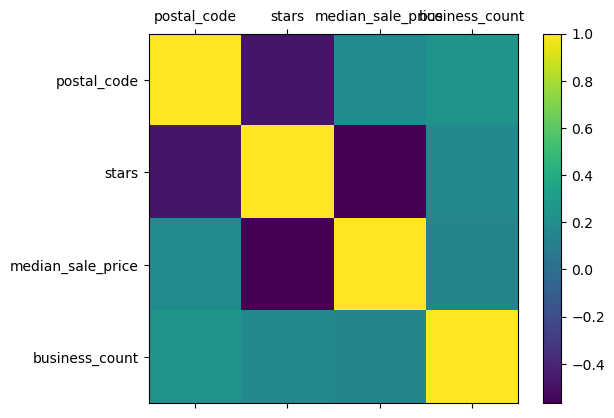

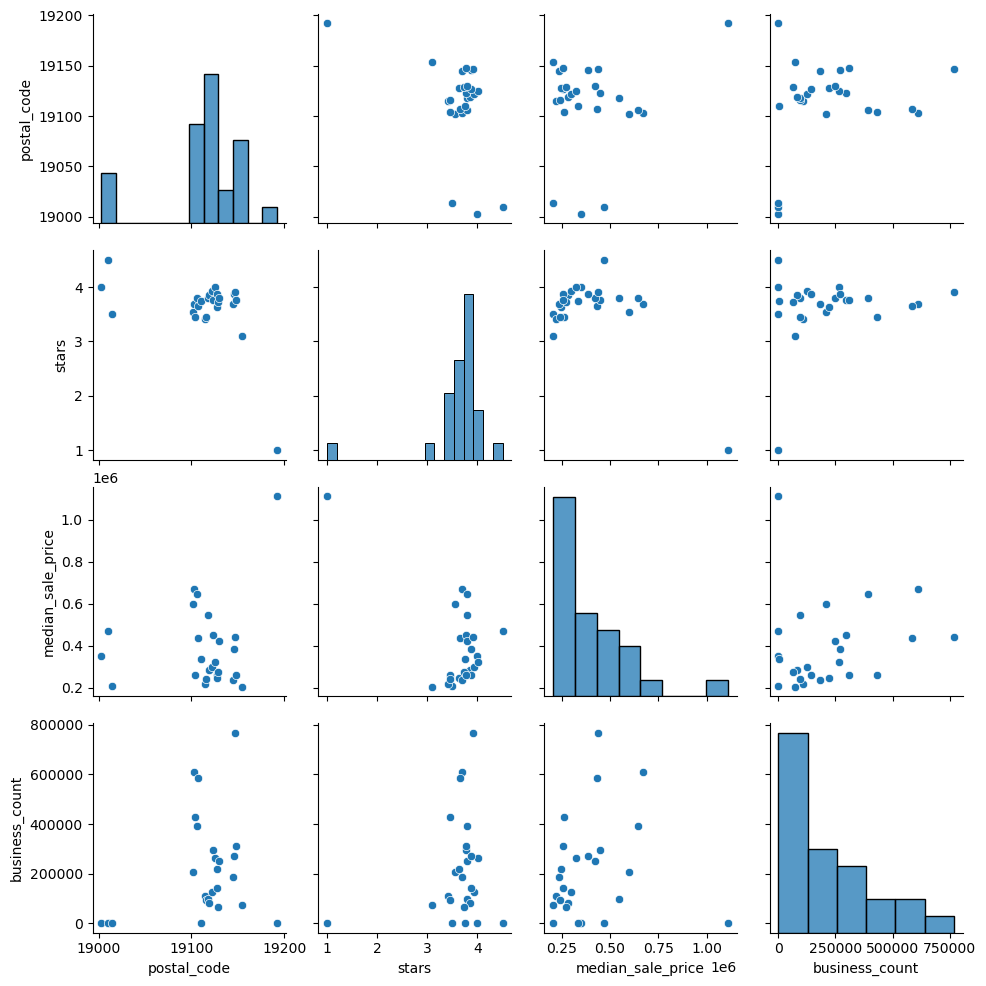

postal_code - stars 
 PearsonRResult(statistic=-0.47531077479583206, pvalue=0.01412879423596085)
postal_code - median_sale_price 
 PearsonRResult(statistic=0.19820783817960236, pvalue=0.3317297448423806)
postal_code - business_count 
 PearsonRResult(statistic=0.2460500022953511, pvalue=0.22564805571424476)
stars - median_sale_price  
 PearsonRResult(statistic=-0.5667284530041623, pvalue=0.002539081216513624)
stars - business_count 
 PearsonRResult(statistic=0.1813743082489539, pvalue=0.3752221814320511)
median_sale_price - business_count 
 PearsonRResult(statistic=0.14327437469727386, pvalue=0.4850242485557143)


In [16]:
#3C
df = pd.read_csv('business_preprocessed.csv')
df_RedfinPhila = pd.read_csv('RedfinPhila.tsv',sep='\t')
df_RedfinPhila = df_RedfinPhila[['region','median_sale_price']]
df_RedfinPhila.groupby(['region']).mean()
df_RedfinPhila['region'] = df_RedfinPhila['region'].map(lambda x: x.lstrip('Zip Code: '))
df_RedfinPhila = df_RedfinPhila.apply(lambda col:pd.to_numeric(col, errors='coerce'))


df = pd.merge(right=df_RedfinPhila, right_on='region', left=df, left_on='postal_code')

df = df[['postal_code','stars','median_sale_price']]
df['business_count'] = 1
agg_functions = {'postal_code':'first','stars':'mean','median_sale_price':'mean','business_count':'sum'}

df = df.groupby(['postal_code']).agg(agg_functions)
df = df[df.median_sale_price > 200000]




fig = plt.figure()
corr_graph = fig.add_subplot(111)

seaborn.pairplot(df)
color_corr_graph = corr_graph.matshow(df.corr())
fig.colorbar(color_corr_graph)

names = ['postal_code','stars','median_sale_price','business_count']
corr_graph.set_xticklabels(['']+names)
corr_graph.set_yticklabels(['']+names)
plt.show(block=True)

print(f'postal_code - stars \n {stats.pearsonr(df.postal_code, df.stars)}')
print(f'postal_code - median_sale_price \n {stats.pearsonr(df.postal_code, df.median_sale_price)}')
print(f'postal_code - business_count \n {stats.pearsonr(df.postal_code, df.business_count)}')
print(f'stars - median_sale_price  \n {stats.pearsonr(df.median_sale_price, df.stars)}')
print(f'stars - business_count \n {stats.pearsonr(df.stars, df.business_count)}')
print(f'median_sale_price - business_count \n {stats.pearsonr(df.median_sale_price, df.business_count)}')


In [17]:
df_RedfinPhila.shape

(45244, 2)

In [18]:
df.shape

(26, 4)

Αφαιρώντας τις φτηνες περιοχες (median_sale_price < 200000 ) παρατηρουμε ορισμενες σημαντικες αλλαγες στις συσχετισεις. Πλεον οι συσχετισεις που εχουν p-value <0.05 αρα και μας ενδιαφερουν ειναι οι :

1) postal_code - stars
2) stars - median_sale_price

1) Για τη συσχετιση postal_code - stars εχουμε Pearson correlation coefficient(ρ)  -1<ρ<0 δηλαδη γραμμικη εξαρτηση με αρνητικη κλιση. Δηλαδη οσο αυξανονται τα stars μειωνεται το postal_code. 

2) Για τη συσχετιση stars - median_sale_price εχουμε Pearson correlation coefficient(ρ) -1<ρ<0 δηλαδη γραμμικη εξαρτηση με αρνητικη κλιση. Αυτο μας λεει οτι οσο αυξανεται το median_sale_price μειωνονται γραμμικα τα stars αυτο ομως συμβαινει γιατι εχουμε εναν εμφανη outlier ο οποιος εχει stars=1 και median_sale_price>1000000. Προκειμενου να παρουμε Pearson correlation εχουμε κανει την υποθεση οτι δεν υπαρχουν outliers. Χωρις τον outlier η συσχετιση αυτη δειχνει αυξηση των median_sale_price οταν αυξανονται τα stars αρα οσο πιο ακριβη ειναι μια περιοχη τοσο πιο καλες επιχειρησεις εχει.


#Askisi 3D 1o part

Ttest_indResult(statistic=-6.467899493575901, pvalue=4.1385085653157247e-10)


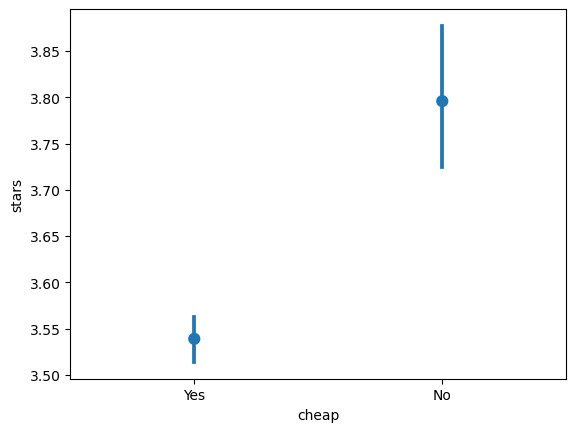

In [22]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
import seaborn
import ast
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_csv('business_preprocessed.csv')
df = df[df.categories.str.contains('Restaurants',na=False)]

df = df.replace(to_replace='None', value=np.nan).dropna()
df['cheap'] =0


for idx,row in df.iterrows():
    str = row.attributes
    dictionary = ast.literal_eval(str)
    dictionary = {key: value for key,value in dictionary.items() if value != (None or 'None' or '')}
    #print(dictionary)
    if 'RestaurantsPriceRange2' in dictionary:
        if(int(dictionary['RestaurantsPriceRange2'])<=2):
            df.at[idx,'cheap']='Yes'
        elif(int(dictionary['RestaurantsPriceRange2'])>2):
            df.at[idx,'cheap']='No'


df = df[df.cheap != 0]

seaborn.pointplot(data=df,x='cheap',y='stars',join=False,ci=95)

print(ttest_ind(df[df.cheap=='Yes']['stars'],df[df.cheap=='No']['stars'],equal_var=False))
plt.show()


In [23]:
df.shape

(4107, 16)

Παρατηρουμε οτι αν ενα μαγαζι ειναι φτηνο τοτε η βαθμολογια του κυμαινεται στα 3.55 stars με μια μικρη διακυμανση ενω αν δεν θεωρείται φτηνο τοτε η μεση βαθμολογια ειναι 3.8 stars ομως με σχετικα μεγαλυτερη διακυμανση.

Το pvalue μας λεει ποσο σημαντικη ειναι η διαφορα αναμεσα στους 2 μεσους και επειδη ειναι πολυ μικροτερο του 0.05 (το οποιο ορισαμε ως οριο κατω απο το οποιο θεωρουμε ενα στατιστικο σημαντικο) η διαφορα που βλεπουμε στα στατιστικα ειναι σημαντικη. Οταν ενα εστιατοριο θεωρειται ακριβο οι αποψεις σχετικα με το αν η ποιοτητα του σε σχεση με την τιμη του εχουν μεγαλυτερη αποκλιση.

#Askisi 3D 2o part

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')
Ttest_indResult(statistic=1.6845394671164202, pvalue=0.09520003553190765)


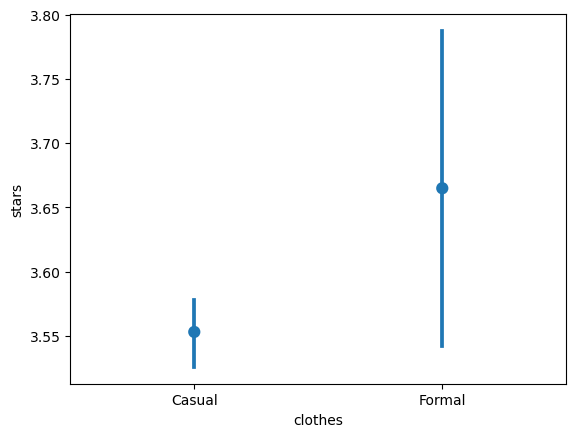

In [24]:
df = pd.read_csv('business_preprocessed.csv')
df = df[df.categories.str.contains('Restaurants',na=False)]

print(df.columns)
df = df.replace(to_replace='None', value=np.nan).dropna()
df['clothes'] = 0


for idx,row in df.iterrows():
    str = row.attributes
    dictionary = ast.literal_eval(str)
    dictionary = {key: value for key,value in dictionary.items() if value != (None or 'None' or '')}
    #print(dictionary)
    if 'RestaurantsAttire' in dictionary:
        #print(dictionary['RestaurantsAttire'])
        if(('dressy' in dictionary['RestaurantsAttire']) or ('formal' in dictionary['RestaurantsAttire'])):
            df.at[idx,'clothes'] = 'Formal'
        elif 'casual' in dictionary['RestaurantsAttire']:
            df.at[idx,'clothes']='Casual'



df = df[df.clothes != 0]

seaborn.pointplot(data=df,x='clothes',y='stars',join=False,ci=95)

print(ttest_ind(df[df.clothes=='Formal']['stars'],df[df.clothes=='Casual']['stars'],equal_var=False))
plt.show()


In [25]:
df.shape

(3601, 16)

Με το ματι παρατηρουμε οτι ενα casual εστιατοριο εχει μεσο ορο αστεριων 3,55 με μικρη διακυμανση ενω ενα formal εστιατοριο εχει μεγαλυτερο μεσο ορο stars ομως με πολυ μεγαλυτερη διακυμανση

Το pvalue μας λεει ποσο σημαντικη ειναι η διαφορα αναμεσα στους 2 μεσους και επειδη ειναι μεγαλυτερο του 0.05 (το οποιο ορισαμε ως οριο κατω απο το οποιο θεωρουμε ενα στατιστικο σημαντικο) τα στατιστικα δεν ειναι σημαντικα.

#Askisi 3E

In [26]:
#3E

df = pd.read_csv('business_preprocessed.csv')
df = df[df.categories.str.contains('Restaurants',na=False)]


df = df.replace(to_replace='None', value=np.nan).dropna()
df['GoodForDate'] = 0
df['Classy'] = 0


for idx,row in df.iterrows():
    str = row.attributes
    dictionary = ast.literal_eval(str)
    dictionary = {key: value for key,value in dictionary.items() if value != (None or 'None' or '')}
    if 'Ambience' in dictionary:
        str2 = dictionary['Ambience']
        dict2 = ast.literal_eval(str2)


        if ('romantic' in dict2) and ('intimate' in dict2):
            if (dict2['romantic'] == True) or (dict2['intimate'] == True):
                df.at[idx,'GoodForDate'] = 'Yes'
            elif (dict2['romantic'] == False) or (dict2['intimate'] == False):
                df.at[idx, 'GoodForDate'] = 'No'


        if ('classy' in dict2) and ('upscale' in dict2):
            if (dict2['classy'] == True) or (dict2['upscale'] == True):
                df.at[idx,'Classy']='Yes'
            elif (dict2['classy'] == False) or (dict2['upscale'] == False):
                df.at[idx,'Classy']='No'





df = df[df.GoodForDate != 0]
df = df[df.Classy != 0]


cdf = pd.crosstab(df['GoodForDate'],df['Classy'])
print(cdf)
print(f'x^2 = {stats.chi2_contingency(cdf)[0]}')
print(f'p value = {stats.chi2_contingency(cdf)[1]}')
#print(f'degrees of freedom = {stats.chi2_contingency(cdf)[2]}')



Classy         No  Yes
GoodForDate           
No           2774  660
Yes            81  105
x^2 = 144.52793371088285
p value = 2.723751535947764e-33


In [27]:
df.shape

(3620, 17)

Με το x2-test μπορουμε να δουμε αν οι μεταβλητες GoodForDate και Classy ειναι ανεξαρτητες. Οσο μεγαλυτερη ειναι η τιμη του χ^2 τοσο λιγοτερο ανεξαρτητες ειναι ενω η τιμη του pvalue οσο μικροτερη ειναι τοσο πιο σημαντικη ειναι η τιμη χ^2 στατιστικα. Εδω εχουμε μια πολυ μικροτερη τιμη απο 0.05 στο pvalue αρα η τιμη του χ^2 ειναι στατιστικα σημαντικη. Η ιδια η τιμη του χ^2 ειναι υψηλη οποτε οι 2 μεταβλητες GoodForDate και Classy δεν ειναι ανεξαρτητες.

Αν ηταν ανεξαρτητες οι 2 μεταβλητες τοτε το contigency table θα ηταν πιο ομοιομορφα διαμοιρασμενο δηλαδη αντι για 2777 και 81 θα ηταν περιπου 1500 και 1500 ενω αντι για 660 και 105 θα ηταν περιπου 350 και 350 με τον contigency table να δειχνει καπως ετσι 

classy         No   Yes

GoodForDate

No            1500  350

Yes           1500  350


In [28]:
#3Z
df = pd.read_csv('business_preprocessed.csv')
df = df[df.categories.str.contains('Restaurants')==False]
print(df.columns)
#add column with unique categories in each row
uniqueCategories = []
for idx,row in df.iterrows():
    s3= row.categories
    word = s3.split(',')
    word = [word[i].strip() for i in range(len(word))]
    for i in word:
        if i not in uniqueCategories:
            uniqueCategories.append(i)

dict = dict.fromkeys(uniqueCategories,"0")

#convert dictionary to string
s2 = "{ "
for key, value in dict.items():
    value = "%s" % value
    s2 += key + ' : ' + value + ', '
s2+='}'
df['vector'] = s2




#group by postal_code

df_grouped = df.groupby("postal_code")

for idx,group in df_grouped:
    #print(idx)
    d = dict
    d = {key: int(value) for key,value in d.items()}
    for index,row in group.iterrows():
        s = row.categories
        categs = s.split(',')
        categs = [categs[i].strip() for i in range(len(categs))]
        for i in categs:
            d[i] +=1

    s1 = "{ "
    for key, value in d.items():
        value = "%s" % value
        s1 += key + ' : ' + value + ', '
    s1 += '}'
    #print(s1)
    df[df.postal_code == idx].at['vector'] = s1


#print(df)


Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_21264\291226051.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.postal_code == idx].at['vector'] = s1
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_21264\291226051.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.postal_code == idx].at['vector'] = s1
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_21264\291226051.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [29]:
df.shape

(8708, 16)

To Z ερωτημα δεν προλαβα να το ολοκληρωσω. Εβαλα μια καινουρια στηλη(vector) που περιεχει ενα λεξικο (σε string) που κραταει τις εμφανισεις του καθε μοναδικου Category για καθε postal_code. Μετα εκανα το dataframe group by postal_code και υπολογιζα για καθε group (δηλαδη για καθε postal_code) ποσες εμφανισεις εχει η καθε λεξη μεσα στο λεξικο vector. Εκει αντιμετωπισα το προβλημα του πως θα προσθεσω το πλεον ενημερωμενο με αριθμους λεξικο (αρχικα ηταν ολες οι τιμες στο 0) στην εκαστοτε στηλη της καθε γραμμης με postal_code == με αυτον που μολις υπολογιζα. Αφου τελειωνε και αυτο το βημα θα εφαρμοζα pearson correlation στα διανυσματα για καθε postal_code (27 unique postal_codes ) και για τις περιοχες με παρομοια διανυσματα θα επαιρνα τις τιμες τους στο attribute price range να δω αν ειναι παρομοιες και ετσι να επιβεβαιωσω ή να διαψευσω την αρχικη υποθεση της εκφωνησης.